# Gradient methods for minimization of unimodal functions

In [108]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [109]:
#midpoint-method
def MidpointAnalitMethod(f, df, a, b, eps):
    count_calculate = 0
    count_iteration = 0
    
    x_min = (a + b) / 2
    while(abs(df(x_min)) > eps):
        count_calculate += 1
        count_iteration += 1
        x_min = (a + b) / 2
        if(df(x_min) > 0):
            b = x_min
        else:
            a = x_min
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    
    return x_min, f(x_min), count_calculate, count_iteration

def MidpointCenter2Method(f, h, a, b, eps):
    count_calculate = 0
    count_iteration = 0
    
    x_min = (a + b) / 2
    while(abs((f(x_min + h) - f(x_min - h)) / (2.0 * h)) > eps):
        count_calculate += 1
        count_iteration += 1
        x_min = (a + b) / 2
        if((f(x_min + h) - f(x_min - h)) / (2.0 * h) > 0):
            b = x_min
        else:
            a = x_min
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    return x_min, f(x_min), count_calculate, count_iteration

def MidpointLeftUpstreamMethod(f, h, a, b, eps):
    count_calculate = 0
    count_iteration = 0
    
    x_min = (a + b) / 2
    while(abs((f(x_min) - f(x_min - h)) / h) > eps):
        count_calculate += 1
        count_iteration += 1
        x_min = (a + b) / 2
        if((f(x_min) - f(x_min - h)) / h > 0):
            b = x_min
        else:
            a = x_min
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    return x_min, f(x_min), count_calculate, count_iteration

def MidpointRightUpstreamMethod(f, h, a, b, eps):
    count_calculate = 0
    count_iteration = 0
    
    x_min = (a + b) / 2
    while(abs((f(x_min + h) - f(x_min)) / h) > eps):
        count_calculate += 1
        count_iteration += 1
        x_min = (a + b) / 2
        if((f(x_min + h) - f(x_min )) / h > 0):
            b = x_min
        else:
            a = x_min
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    return x_min, f(x_min), count_calculate, count_iteration

In [110]:
#chord-method
def ChordAnalitMethod(f, df, a, b, eps):
    if (df(a) * df(b) < 0):
        count_calculate = 0
        count_iteration = 0
        x_min = a - df(a) / (df(a) - df(b)) * (a - b)

        while(abs(df(x_min)) > eps):
            count_iteration += 1
            count_calculate += 2
            x_min = a - df(a) / (df(a) - df(b)) * (a - b)

            if(df(x_min) > 0):
                b = x_min
            else:
                a = x_min
#         print("Понадобилось вычислений: " + str(count_calculate))
#         print("Метод сошелся за: " + str(count_iteration))
    elif(df(a) > 0 and df(b) > 0):
        x_min = a
    else:
        x_min = b
            
    return x_min, f(x_min), count_calculate, count_iteration

In [111]:
#Newton's-method
def NewtonAnalitMethod(f, df, ddf, a, b, eps, x0):
    count_calculate = 1
    count_iteration = 0
    
    d = df(x0)
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 2
        x0 = x0 - d / ddf(x0)
        d  = df(x0)
    return x0, f(x0), count_calculate, count_iteration

def NewtonCenterMethod(f, h, a, b, eps, x0):
    count_calculate = 2
    count_iteration = 0
    
    d = (f(x0 + h) - f(x0 - h)) / 2.0 / h
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 5
        d2 = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h ** 2
        x0 = x0 - d / d2
        d  = (f(x0 + h) - f(x0 - h)) / 2.0 / h
    return x0, f(x0), count_calculate, count_iteration

def NewtonLeftMethod(f, h, a, b, eps, x0):
    count_calculate = 2
    count_iteration = 0
    
    d = (f(x0) - f(x0 - h)) / h
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 5
        d2 = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h ** 2
        x0 = x0 - d / d2
        d  = (f(x0) - f(x0 - h)) / h
    return x0, f(x0), count_calculate, count_iteration

#Newton-Raphson-method
def NewtonRaphsonAnalitMethod(f, df, ddf, a, b, eps, x0):
    count_calculate = 1
    count_iteration = 0
    
    d = df(x0)
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 3
        dd = ddf(x0)
        x_buff = x0 - d / dd
        tau = d ** 2 / (d ** 2 + df(x_buff) ** 2)
        x0 = x0 - d / dd * tau
        d  = df(x0)
    return x0, f(x0), count_calculate, count_iteration

def NewtonRaphsonCenterMethod(f, h, a, b, eps, x0):
    count_calculate = 2
    count_iteration = 0
    
    d = (f(x0 + h) - f(x0 - h)) / 2.0 / h
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 7
        dd = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h ** 2
        x_buff = x0 - d / dd
        tau = d ** 2 / (d ** 2 + ((f(x_buff + h) - f(x_buff - h)) / 2.0 / h)  ** 2)
        x0 = x0 - d / dd * tau
        d  = (f(x0 + h) - f(x0 - h)) / 2.0 / h
    return x0, f(x0), count_calculate, count_iteration

#Newton-Marquardt-method
def NewtonMarquardtAnalitMethod(f, df, ddf, a, b, eps, x0):
    count_calculate = 2
    count_iteration = 0
    
    d = df(x0)
    mu = ddf(x0) * 50.0
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 4
        old_x0 = x0
        dd = ddf(x0)
        x0 = x0 - d / (dd + mu)
        d  = df(x0)
        if (f(x0) < f(old_x0)):
            mu = mu / 2.0
        else:
            mu = 2.0 * mu
    return x0, d, count_calculate, count_iteration

def NewtonMarquardtCenterMethod(f, h, a, b, eps, x0):
    count_calculate = 5
    count_iteration = 0
    
    d = (f(x0 + h) - f(x0 - h)) / 2.0 / h
    dd = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h ** 2
    mu = dd * 50.0
    while (abs(d) > eps):
        count_iteration += 1
        count_calculate += 7
        old_x0 = x0
        x0 = x0 - d / (dd + mu)
        d  = (f(x0 + h) - f(x0 - h)) / 2.0 / h
        dd = (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h ** 2
        if (f(x0) < f(old_x0)):
            mu = mu / 2.0
        else:
            mu = 2.0 * mu
    return x0, f(x0), count_calculate, count_iteration

### Test
Test function $f(x) = x^3 - sin(x)$

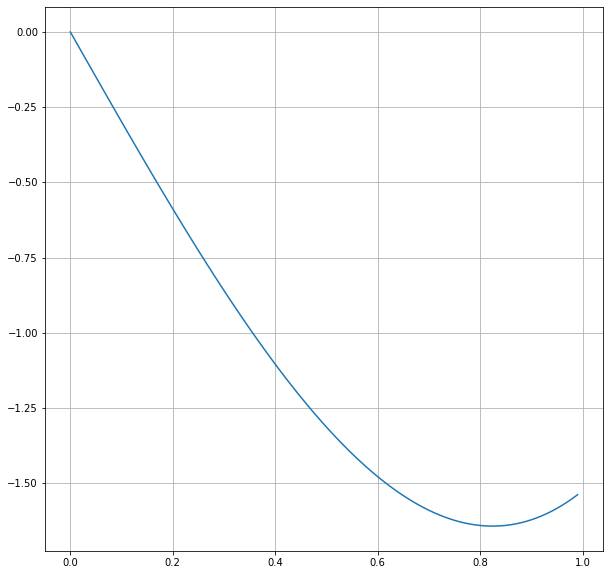

In [112]:
a = 0
b = 1
x = np.arange(a, b, 0.01)
def f(x):
    return x ** 3 - 3 * np.sin(x)
def df(x):
    return 3 * x ** 2 - 3 * np.cos(x)
def ddf(x):
    return 6 * x + 3 * np.sin(x)
y = f(x)

plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(x, y)

In [122]:
M = 20
eps = np.zeros(M)
count_c_MAM = np.zeros(M)
count_i_MAM = np.zeros(M)
count_c_CAM = np.zeros(M)
count_i_CAM = np.zeros(M)
count_c_NAM = np.zeros(M)
count_i_NAM = np.zeros(M)
count_c_NCM = np.zeros(M)
count_i_NCM = np.zeros(M)
count_c_NRAM = np.zeros(M)
count_i_NRAM = np.zeros(M)
count_c_NRCM = np.zeros(M)
count_i_NRCM = np.zeros(M)
count_c_NMAM = np.zeros(M)
count_i_NMAM = np.zeros(M)
count_c_NMCM = np.zeros(M)
count_i_NMCM = np.zeros(M)

for i in range(M):
    eps[i] = 2 ** (-(i))
    fm, xm, count_c_MAM[i], count_i_MAM[i] = MidpointAnalitMethod(f, df, a, b, eps[i])
    fm, xm, count_c_CAM[i], count_i_CAM[i] = ChordAnalitMethod(f, df, a, b, eps[i])
    fm, xm, count_c_NAM[i], count_i_NAM[i]   = NewtonAnalitMethod(f, df, ddf, a, b, eps[i], 0.9)
    fm, xm, count_c_NCM[i], count_i_NCM[i] = NewtonCenterMethod(f, eps[i], a, b, eps[i], 0.9)
    fm, xm, count_c_NRAM[i], count_i_NRAM[i] = NewtonRaphsonAnalitMethod(f, df, ddf, a, b, eps[i], 0.9) 
    fm, xm, count_c_NRCM[i], count_i_NRCM[i] = NewtonRaphsonCenterMethod(f, eps[i], a, b, eps[i], 0.9) 
    fm, xm, count_c_NMAM[i], count_i_NMAM[i] = NewtonMarquardtAnalitMethod(f, df, ddf, a, b, eps[i], 0.9)
    fm, xm, count_c_NMCM[i], count_i_NMCM[i] = NewtonMarquardtCenterMethod(f, eps[i], a, b, eps[i], 0.9)

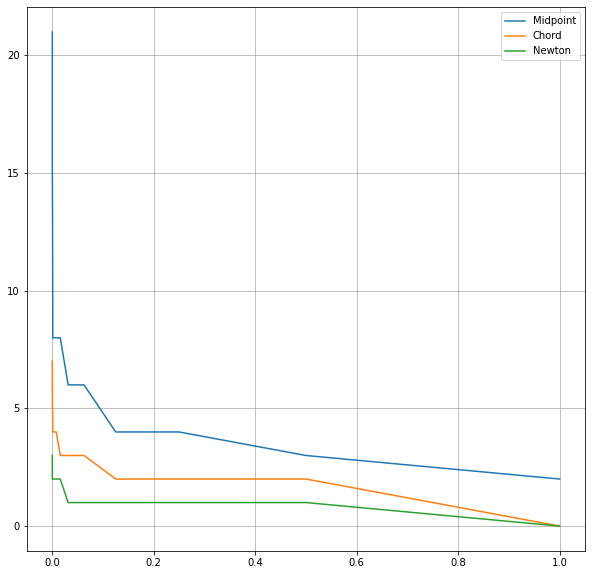

In [123]:
#Сравнение градиентных аналитических методов по числу итераций
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps, count_i_MAM)
plt.plot(eps, count_i_CAM)
plt.plot(eps, count_i_NAM)
plt.legend(labels = ['Midpoint', 'Chord', 'Newton'])

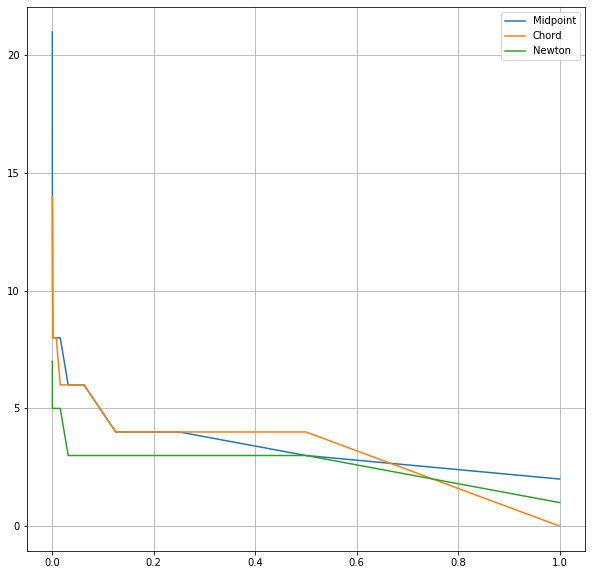

In [125]:
#Сравнение градиентных аналитических методов по количеству вычислений функции или ее производных
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps, count_c_MAM)
plt.plot(eps, count_c_CAM)
plt.plot(eps, count_c_NAM)
plt.legend(labels = ['Midpoint', 'Chord', 'Newton'])

### Сравнение методов Ньютона относительно вычисления производных

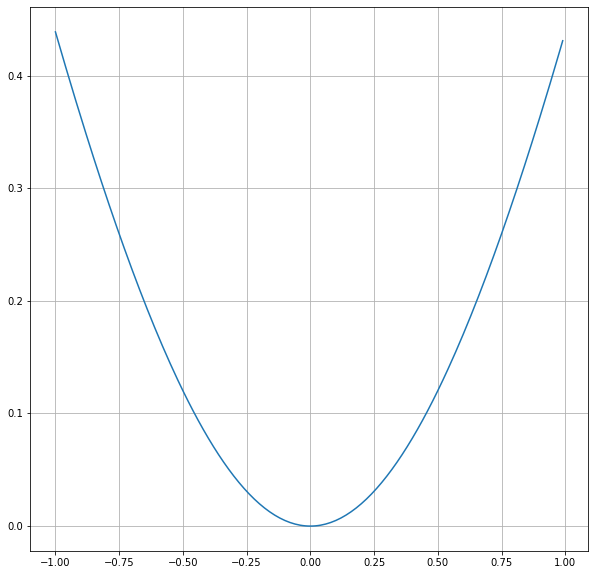

In [137]:
a = -1
b = 1
x = np.arange(a, b, 0.01)
def f(x):
    return x * np.arctan(x) - 1/2 * np.log(1 + x ** 2)
def df(x):
    return np.arctan(x)
def ddf(x):
    return 1 / (x ** 2 + 1)

y = f(x)

plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(x, y)

In [138]:
M = 20
eps = np.zeros(M)
count_c_NAM = np.zeros(M)
count_i_NAM = np.zeros(M)
count_c_NCM = np.zeros(M)
count_i_NCM = np.zeros(M)
count_c_NRAM = np.zeros(M)
count_i_NRAM = np.zeros(M)
count_c_NRCM = np.zeros(M)
count_i_NRCM = np.zeros(M)
count_c_NMAM = np.zeros(M)
count_i_NMAM = np.zeros(M)
count_c_NMCM = np.zeros(M)
count_i_NMCM = np.zeros(M)

for i in range(M):
    eps[i] = 2 ** (-(i))
    fm, xm, count_c_NAM[i], count_i_NAM[i]   = NewtonAnalitMethod(f, df, ddf, a, b, eps[i], 0.9)
    fm, xm, count_c_NCM[i], count_i_NCM[i] = NewtonCenterMethod(f, eps[i], a, b, eps[i], 0.9)
    fm, xm, count_c_NRAM[i], count_i_NRAM[i] = NewtonRaphsonAnalitMethod(f, df, ddf, a, b, eps[i], 0.9) 
    fm, xm, count_c_NRCM[i], count_i_NRCM[i] = NewtonRaphsonCenterMethod(f, eps[i], a, b, eps[i], 0.9) 
    fm, xm, count_c_NMAM[i], count_i_NMAM[i] = NewtonMarquardtAnalitMethod(f, df, ddf, a, b, eps[i], 0.9)
    fm, xm, count_c_NMCM[i], count_i_NMCM[i] = NewtonMarquardtCenterMethod(f, eps[i], a, b, eps[i], 0.9)

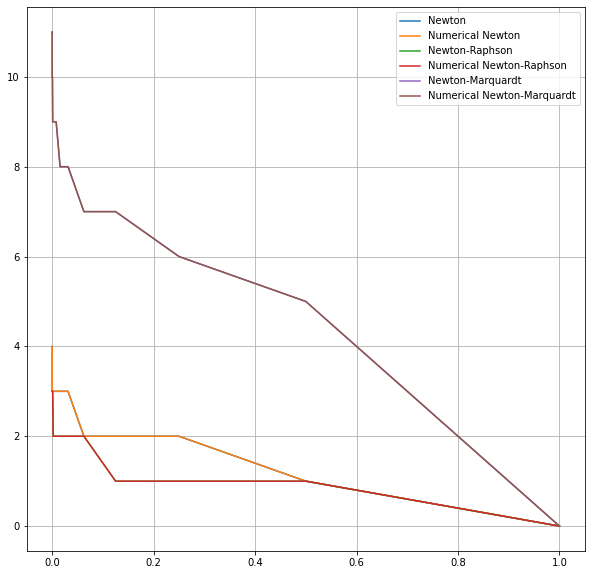

In [139]:
#Сравнение методов Ньютона по числу итераций
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps, count_i_NAM)
plt.plot(eps, count_i_NCM)
plt.plot(eps, count_i_NRAM)
plt.plot(eps, count_i_NRCM)
plt.plot(eps, count_i_NMAM)
plt.plot(eps, count_i_NMCM)
plt.legend(labels = ['Newton', 'Numerical Newton', 'Newton-Raphson', 'Numerical Newton-Raphson', 'Newton-Marquardt', 'Numerical Newton-Marquardt'])

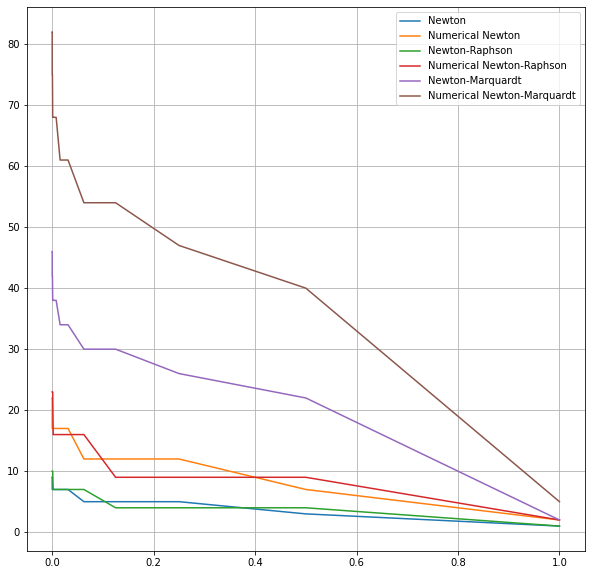

In [140]:
#Сравнение методов Ньютона по количеству вычислений производной
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps, count_c_NAM)
plt.plot(eps, count_c_NCM)
plt.plot(eps, count_c_NRAM)
plt.plot(eps, count_c_NRCM)
plt.plot(eps, count_c_NMAM)
plt.plot(eps, count_c_NMCM)
plt.legend(labels = ['Newton', 'Numerical Newton', 'Newton-Raphson', 'Numerical Newton-Raphson', 'Newton-Marquardt', 'Numerical Newton-Marquardt'])

In [147]:
#Исследование зависимости от начального приближения методов Ньютона
x0 = 3
fm, xm, count_c_NAM[i], count_i_NAM[i]   = NewtonAnalitMethod(f, df, ddf, a, b, 0.01, x0)
fm, xm, count_c_NCM[i], count_i_NCM[i] = NewtonCenterMethod(f, 0.01, a, b, 0.01, x0)
fm, xm, count_c_NRAM[i], count_i_NRAM[i] = NewtonRaphsonAnalitMethod(f, df, ddf, a, b, 0.01, x0) 
fm, xm, count_c_NRCM[i], count_i_NRCM[i] = NewtonRaphsonCenterMethod(f, 0.01, a, b, 0.01, x0) 
fm, xm, count_c_NMAM[i], count_i_NMAM[i] = NewtonMarquardtAnalitMethod(f, df, ddf, a, b, 0.01, x0)
fm, xm, count_c_NMCM[i], count_i_NMCM[i] = NewtonMarquardtCenterMethod(f, 0.01, a, b, 0.01, x0)

/var/folders/62/qcpzgx416yvflb5n3_n5_vr00000gn/T/ipykernel_9615/3501426974.py:9: RuntimeWarning: overflow encountered in double_scalars
  return 1 / (x ** 2 + 1)
/var/folders/62/qcpzgx416yvflb5n3_n5_vr00000gn/T/ipykernel_9615/3243177407.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  x0 = x0 - d / ddf(x0)
/var/folders/62/qcpzgx416yvflb5n3_n5_vr00000gn/T/ipykernel_9615/3243177407.py:10: RuntimeWarning: invalid value encountered in double_scalars
  x0 = x0 - d / ddf(x0)
/var/folders/62/qcpzgx416yvflb5n3_n5_vr00000gn/T/ipykernel_9615/3243177407.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  x0 = x0 - d / d2
/var/folders/62/qcpzgx416yvflb5n3_n5_vr00000gn/T/ipykernel_9615/3501426974.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return x * np.arctan(x) - 1/2 * np.log(1 + x ** 2)
